## Numeric Data Visualisation
Questions to answer:
1. What are distributions of the features?
2. Are there any linearly correlated features?
3. Are there any correlated nan features?
4. What are the main differences in the numerical measurements for different responces 0 and 1?

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


feature_names = ['L1_S24_F1695', 'L1_S24_F1632','L3_S33_F3855', 'L1_S24_F1604','L3_S29_F3407', 'L1_S24_F1723',
                 'L3_S38_F3960', 'L3_S33_F3865', 'L3_S38_F3956', 'L3_S33_F3857',
                 'L3_S29_F3321', 'L1_S24_F1846', 'L3_S32_F3850', 'L3_S29_F3354',
                 'L3_S29_F3324', 'L3_S35_F3889', 'L0_S1_F28', 'L1_S24_F1844',
                 'L3_S29_F3376', 'L0_S0_F22', 'L3_S33_F3859', 'L3_S38_F3952', 
                 'L3_S30_F3754', 'L2_S26_F3113', 'L3_S30_F3759', 'L0_S5_F114'
]

In [13]:
numeric_cols = pd.read_csv("train_numeric.csv", nrows = 1).columns.values
ids = [np.argwhere(feature_name == numeric_cols)[0][0] for feature_name in feature_names]
train = pd.read_csv("train_numeric.csv", 
                index_col = 0, header = 0, usecols = [0, len(numeric_cols) - 1] + ids)

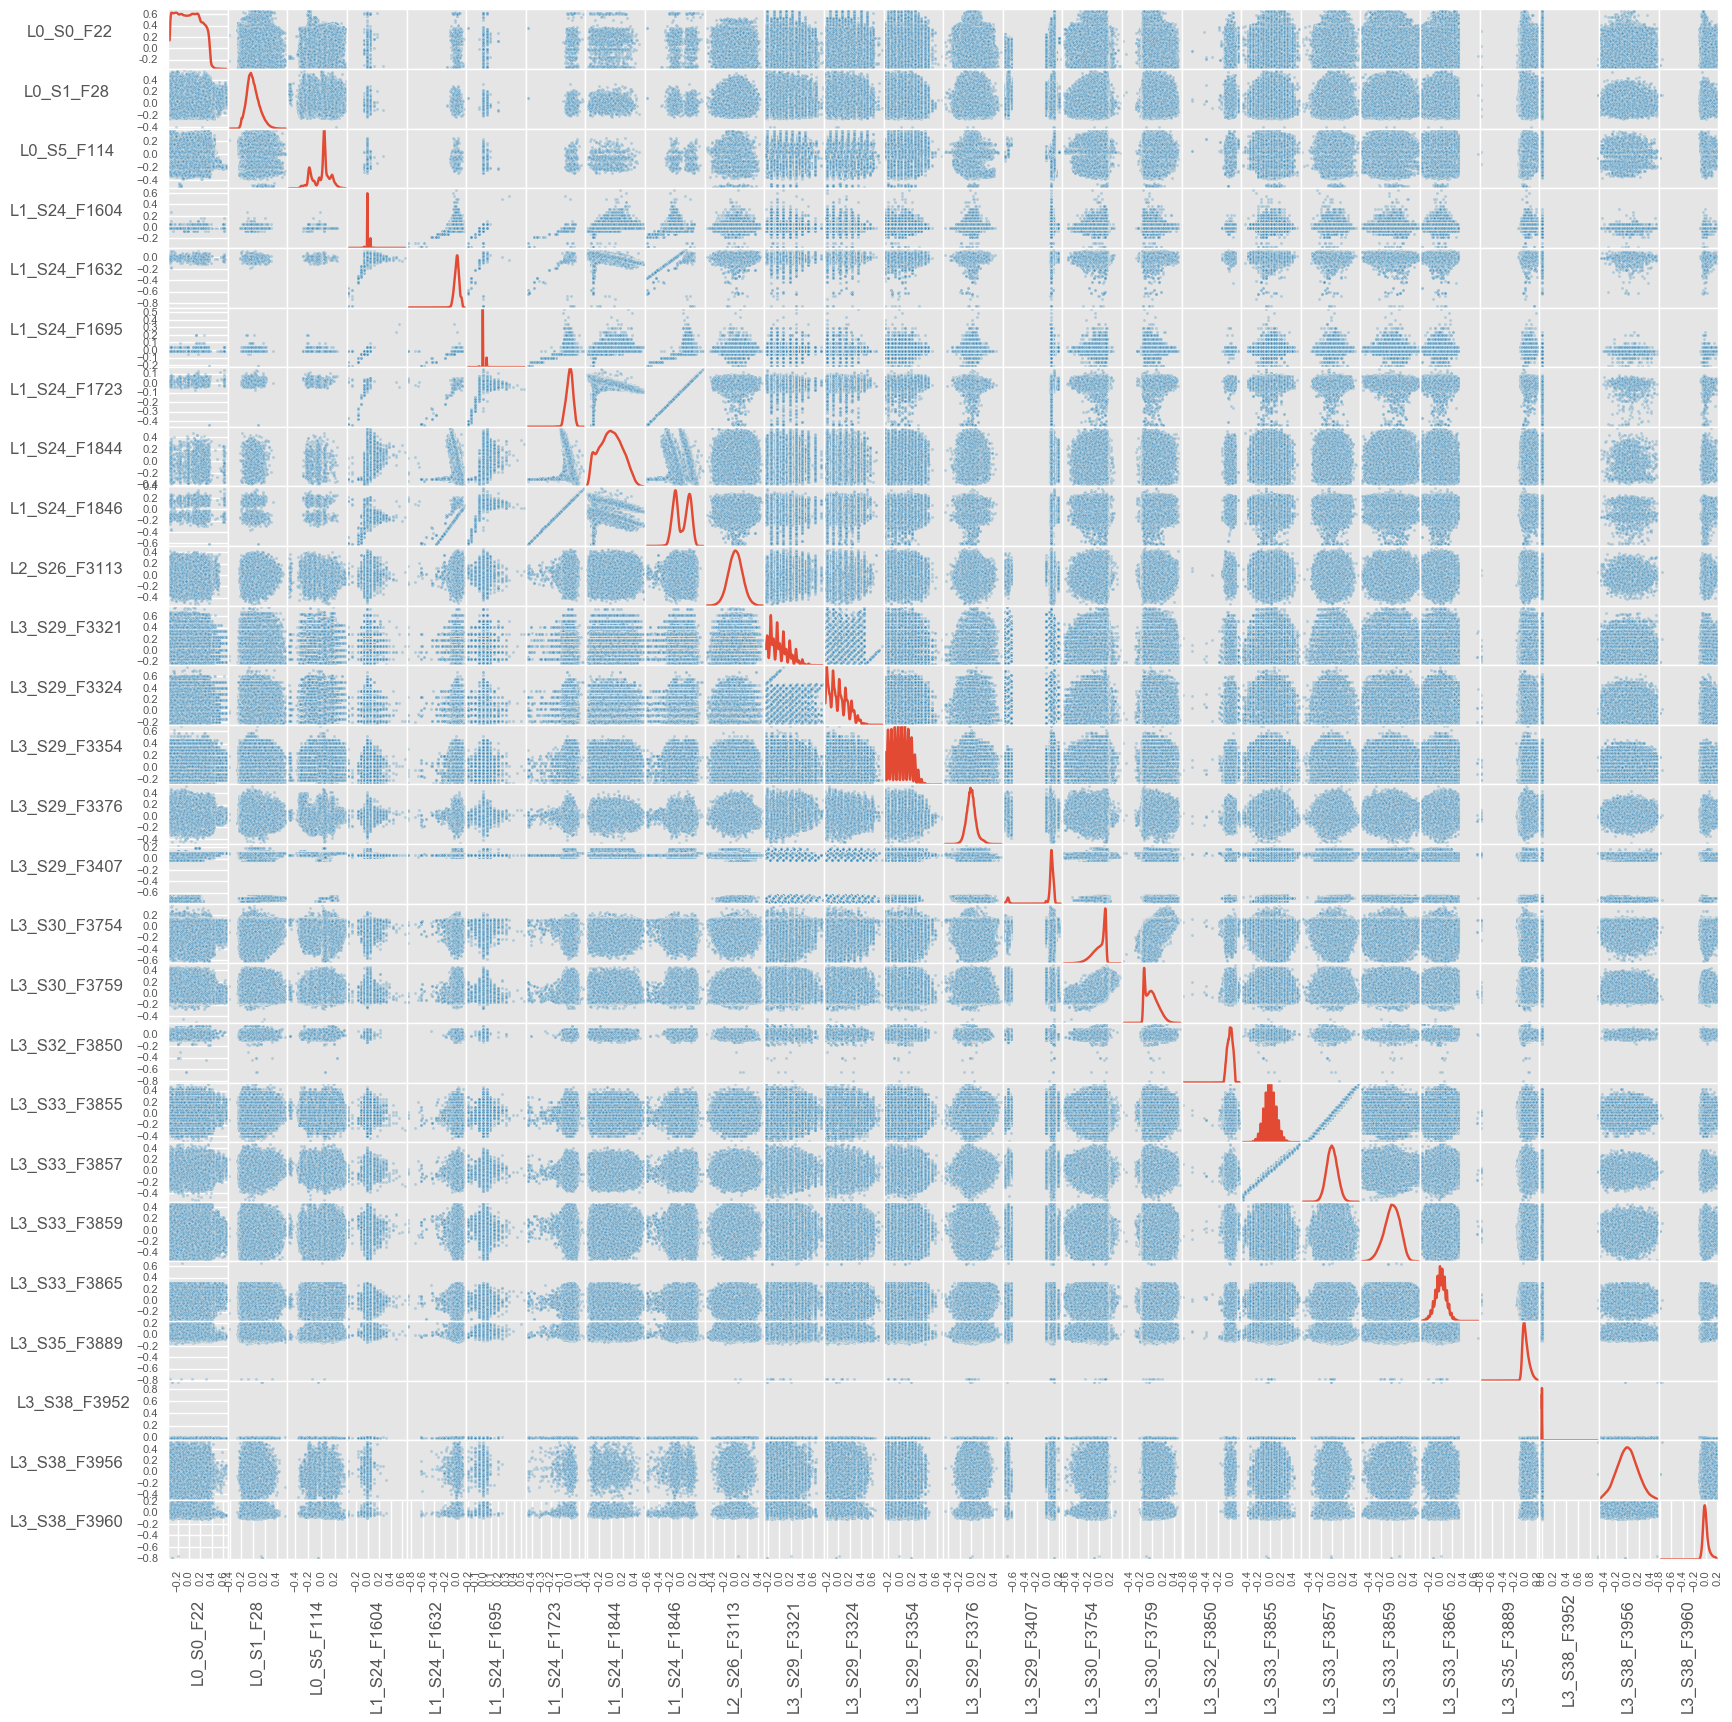

In [14]:
# Produce a scatter matrix for each pair of features in the data
#colors=['red','green']
import matplotlib
matplotlib.style.use('ggplot')
cols = [col for col in train.columns if col not in ['Response']]
axs = pd.scatter_matrix(train[cols], alpha = 0.3, 
                  figsize = (20,20), 
                  diagonal = 'kde', 
#                  marker='x', 
#                  c=train.Response.apply(lambda x:colors[x]),
)
n = len(cols)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50        

Some of the features are normally distributed, some are positivly/negativly skewed and some have very scattered values. Only few features has linear correlations. 

In [3]:
b_size = 1
train = train[feature_names + ['Response']]
train_batch =[pd.melt(train[train.columns[batch: batch + b_size].append(np.array(['Response']))], 
                      id_vars = 'Response', value_vars = feature_names[batch: batch + b_size])
              for batch in list(range(0, train.shape[1] - 1, b_size))]

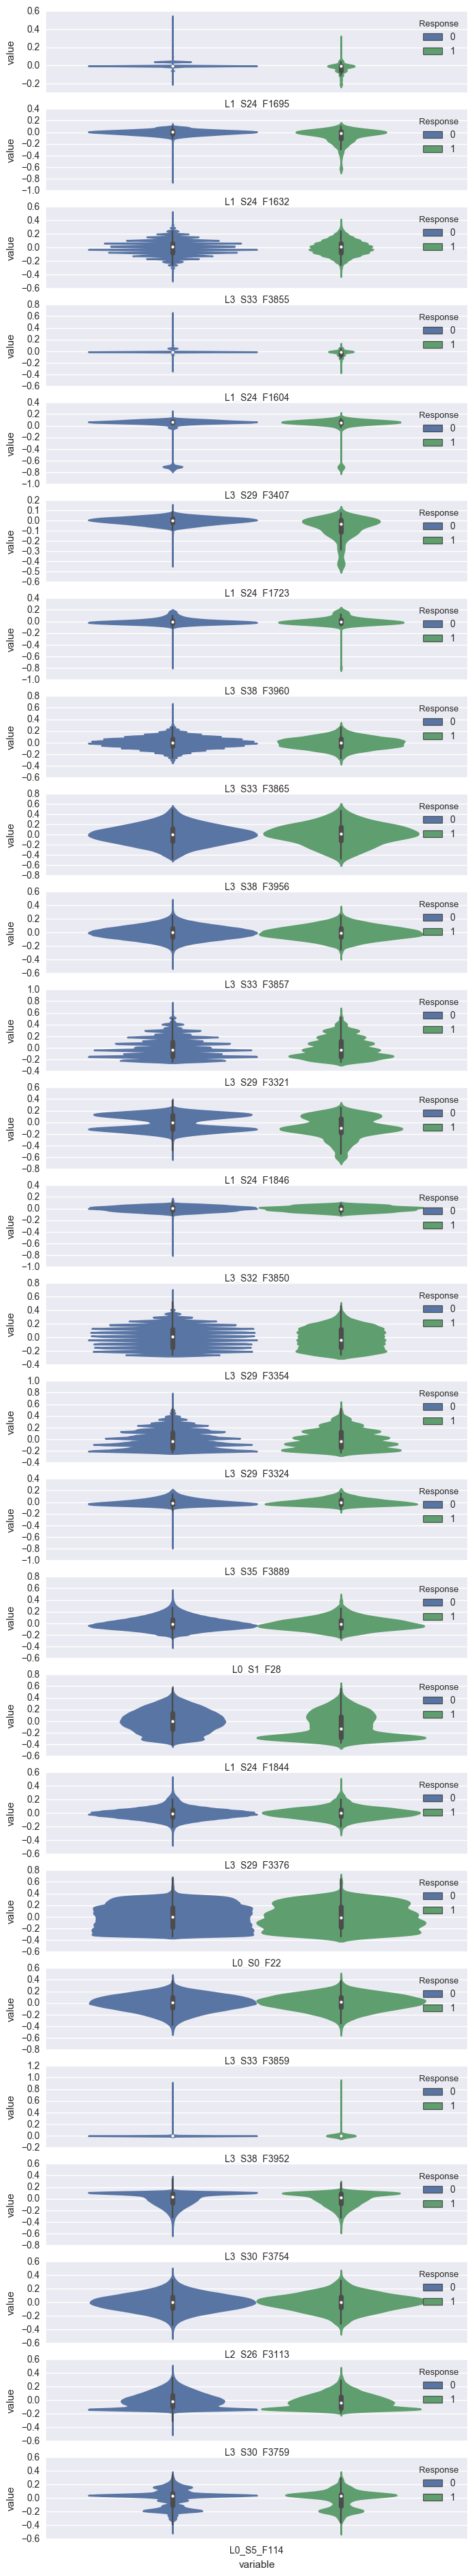

In [4]:
fig_s = (8,48)
_, axs = plt.subplots(len(train_batch), figsize = fig_s)
for data, ax in zip(train_batch, axs):
#    sns.set_style("ticks")
#    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 1.5})
    sns.violinplot(x='variable',  
                   y='value',
                   hue='Response', 
                   data=data,
                   orient='v',
                   ax=ax, 
#                  scale='area',
                   lw=0.01,
                   split=False
    )  

Looking at feature F3354 it is clear that broken samples(Class 1) have smooth distibutions e.g. like one can
not switch them, while working devices do have only descrete values. 

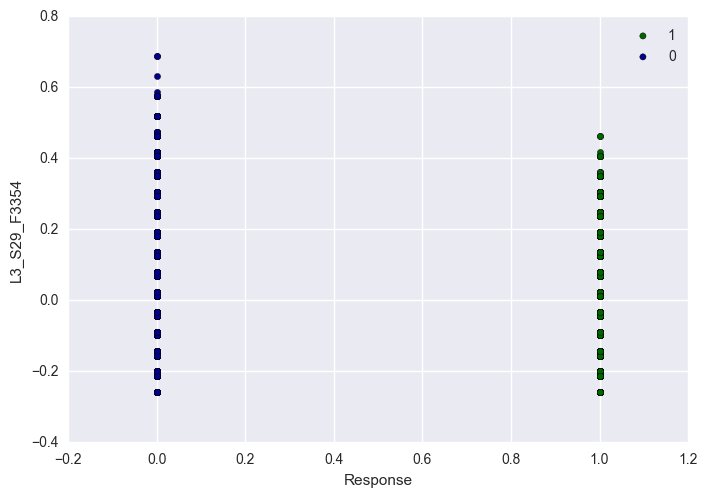

In [97]:
test = train.loc[:, ['L3_S29_F3354','Response']]
positive = test[test.Response==1]
negative = test[test.Response==0]
#positive.plot(style=['o','rx'])
ax = positive.plot(kind='scatter',
                   x='Response',
                   y='L3_S29_F3354',
                   color='DarkGreen', label='1'
                  )
negative.plot(kind='scatter',
              x='Response',
              y='L3_S29_F3354',
              color='DarkBlue', label='0',
              ax=ax
             )

In fact, both have descrete values, but broken samples has norrow values range!

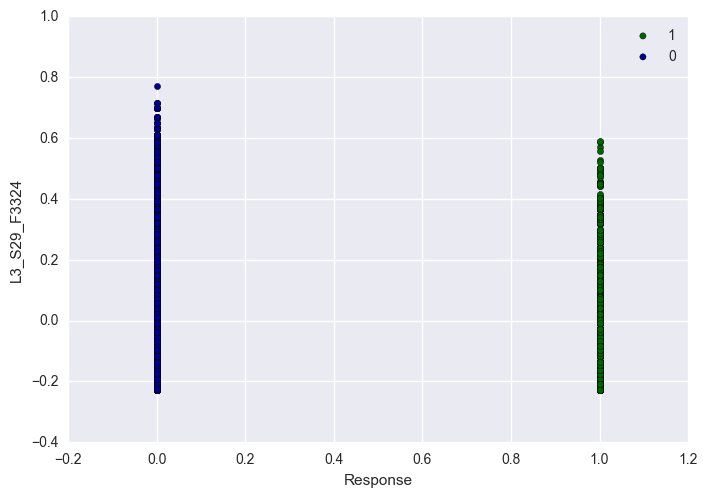

In [98]:
test = train.loc[:, ['L3_S29_F3324','Response']]
positive = test[test.Response==1]
negative = test[test.Response==0]
#positive.plot(style=['o','rx'])
ax = positive.plot(kind='scatter',
                   x='Response',
                   y='L3_S29_F3324',
                   color='DarkGreen', label='1'
                  )
negative.plot(kind='scatter',
              x='Response',
              y='L3_S29_F3324',
              color='DarkBlue', label='0',
              ax=ax
             )

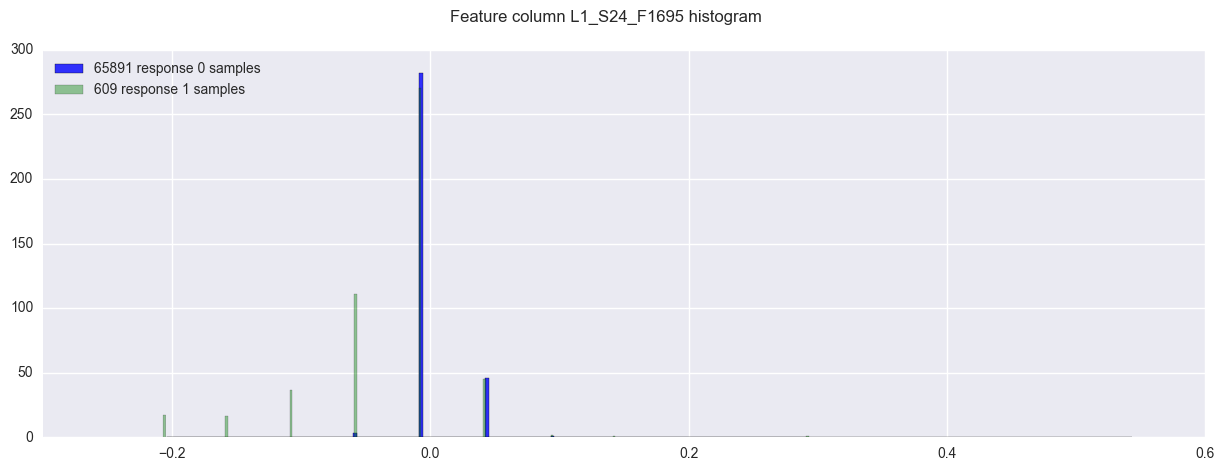

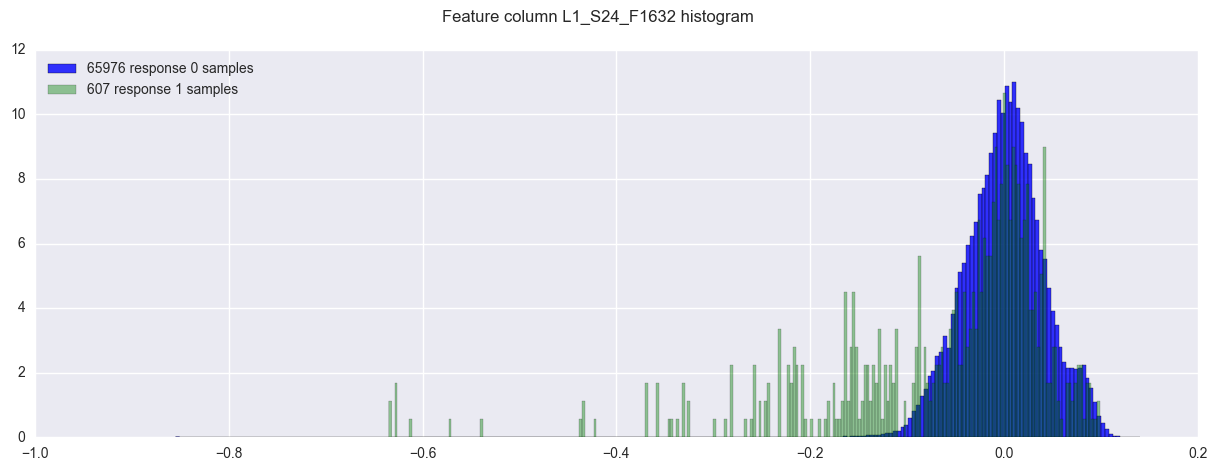

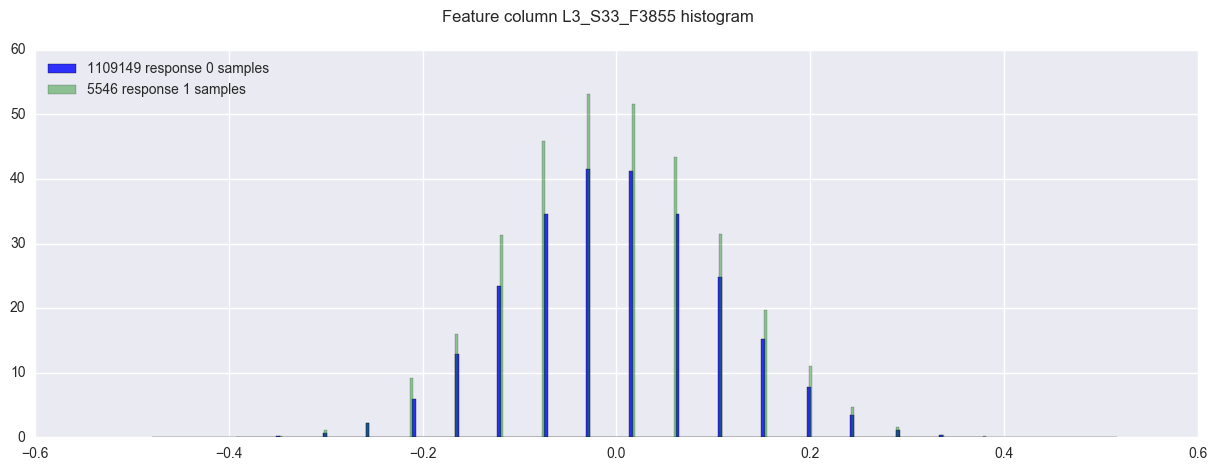

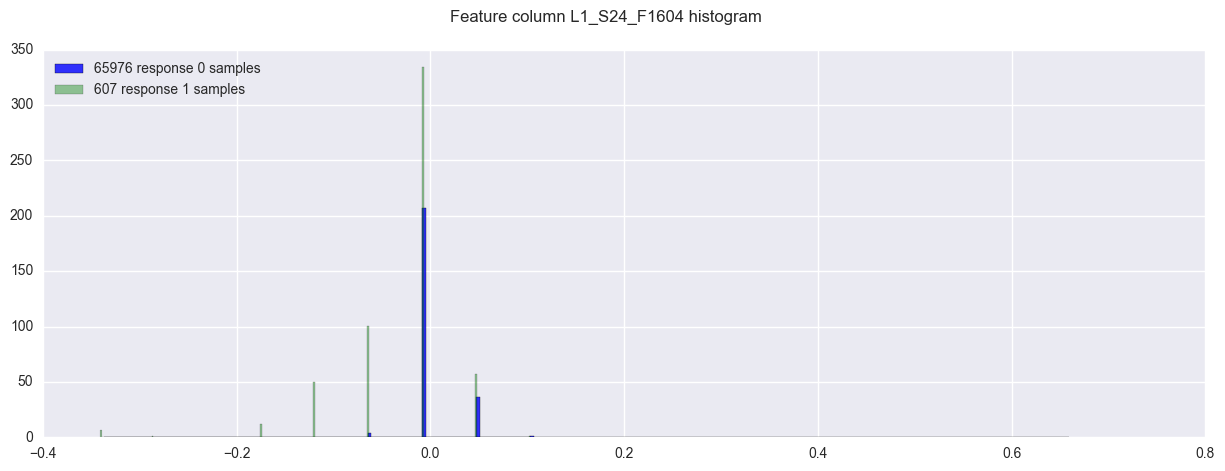

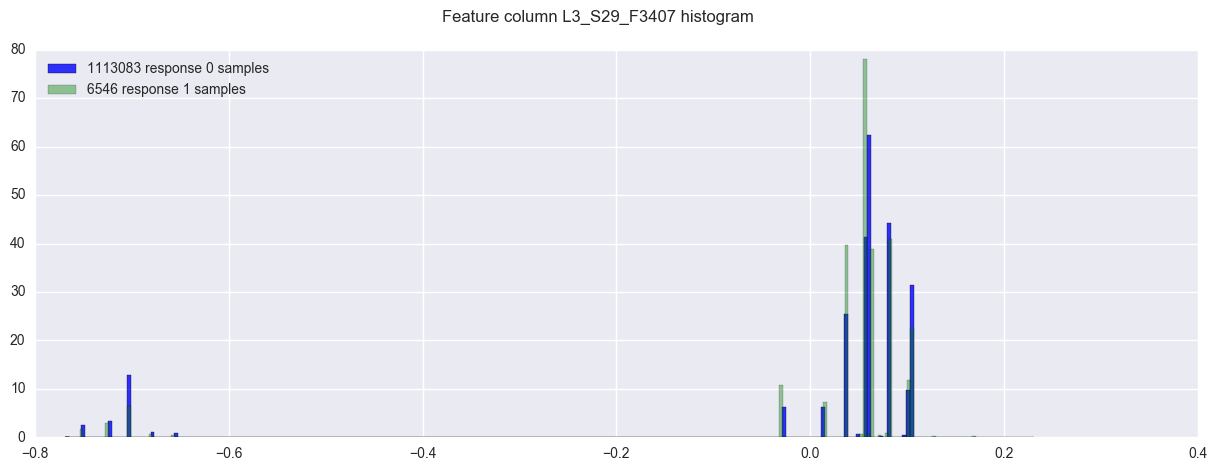

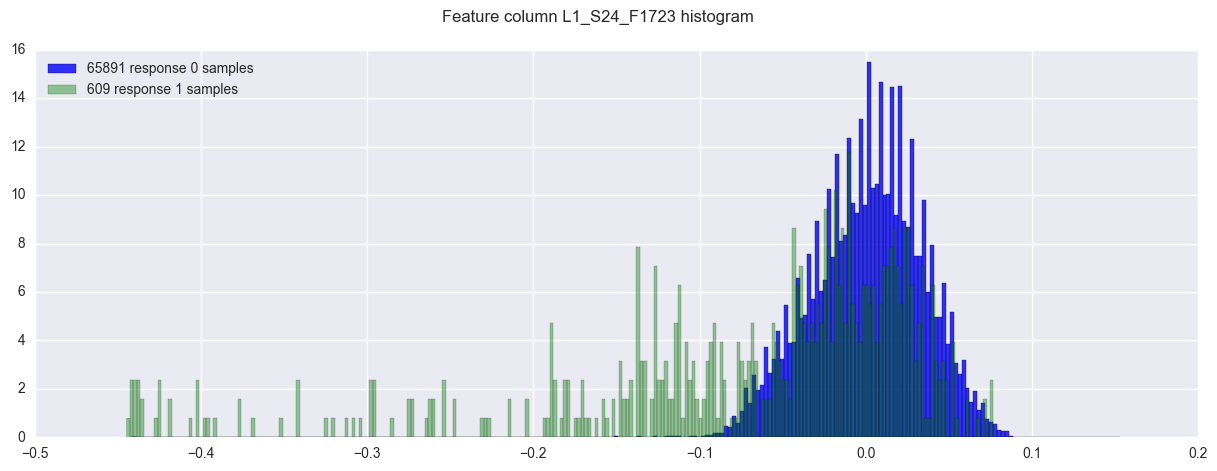

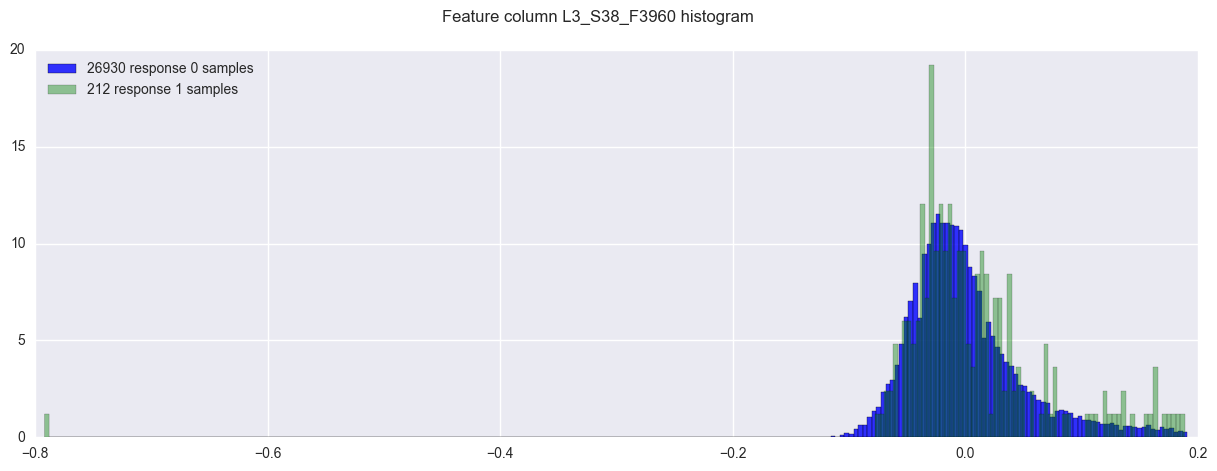

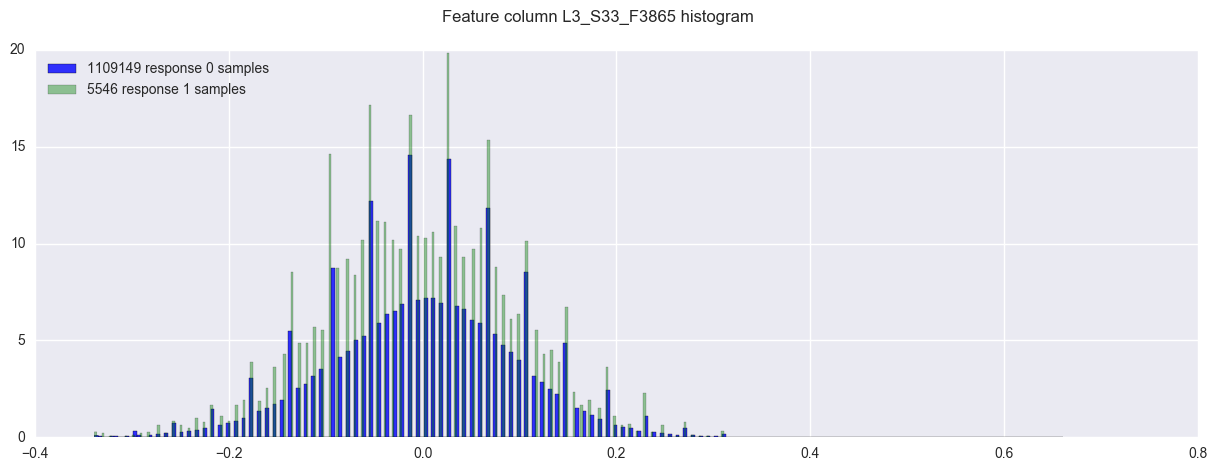

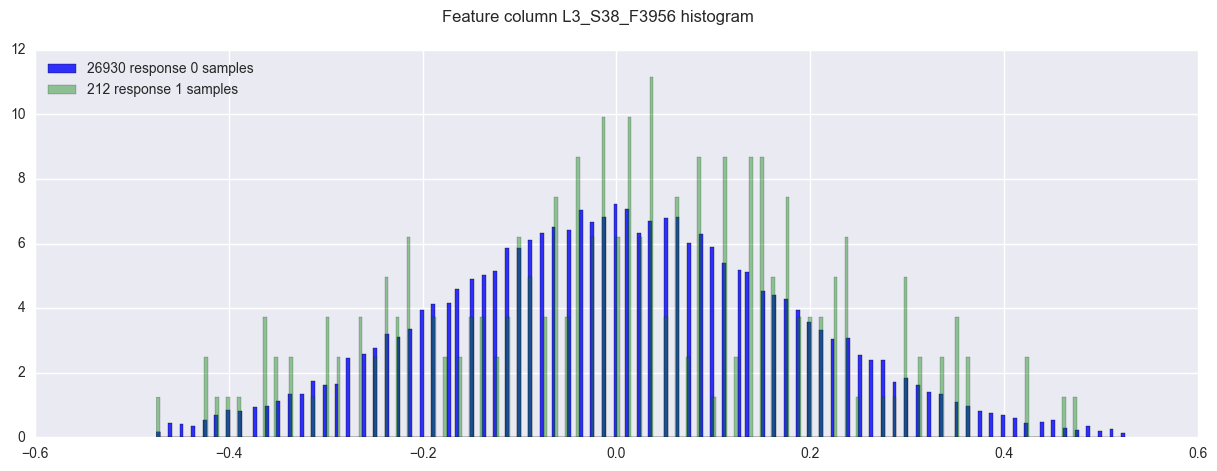

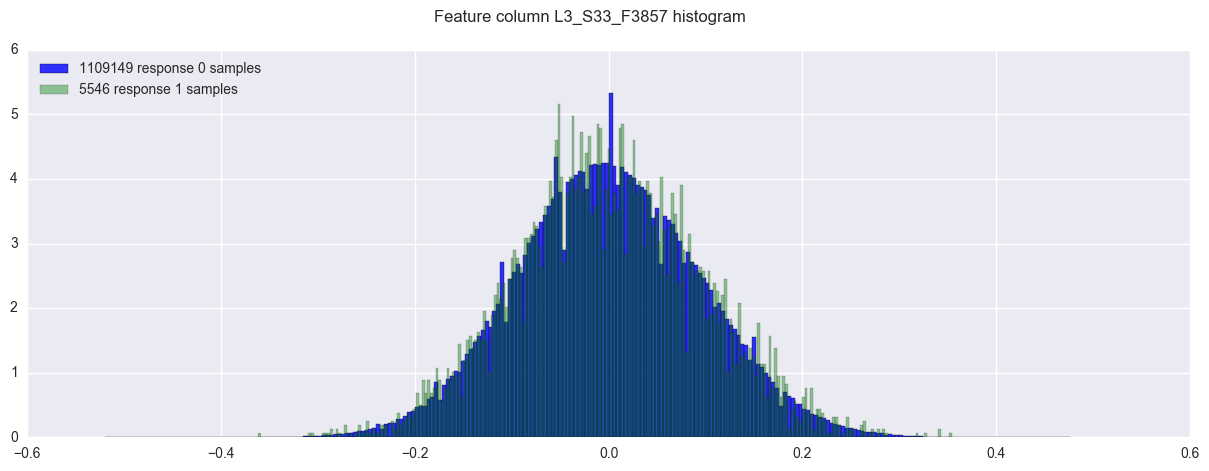

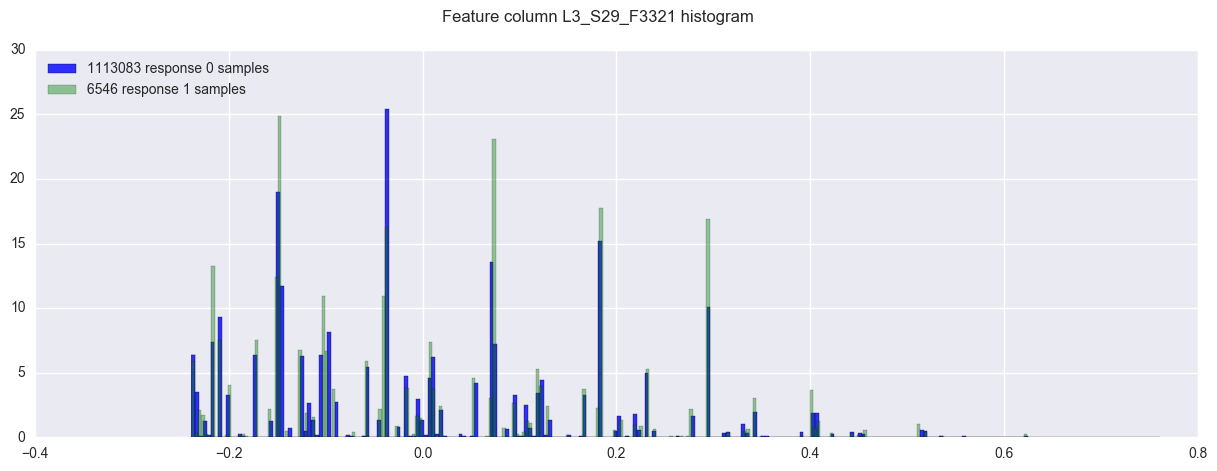

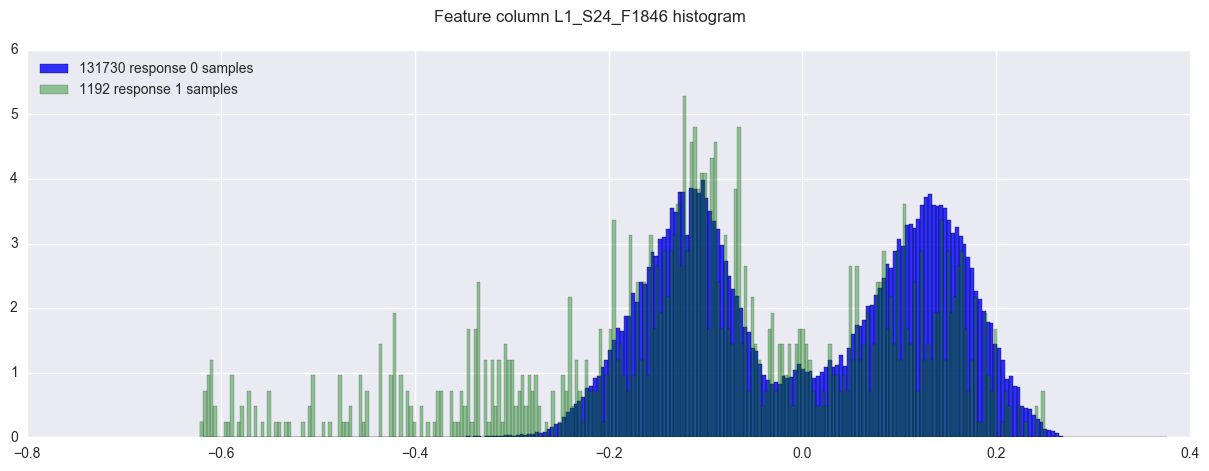

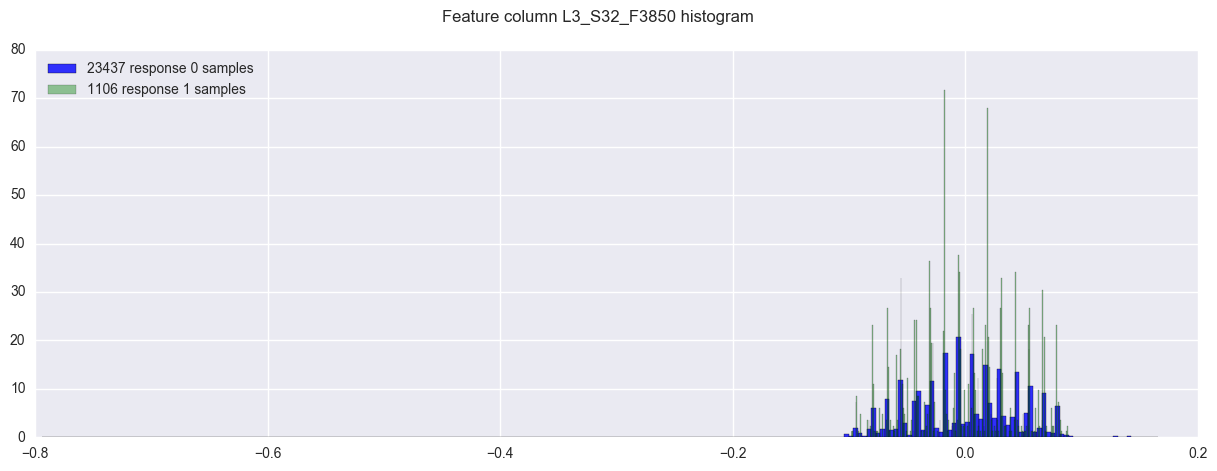

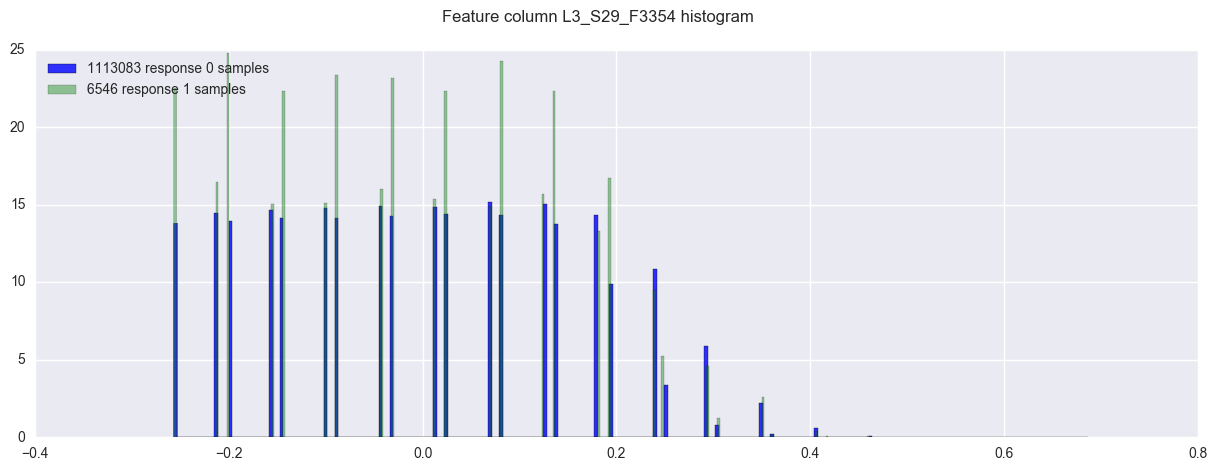

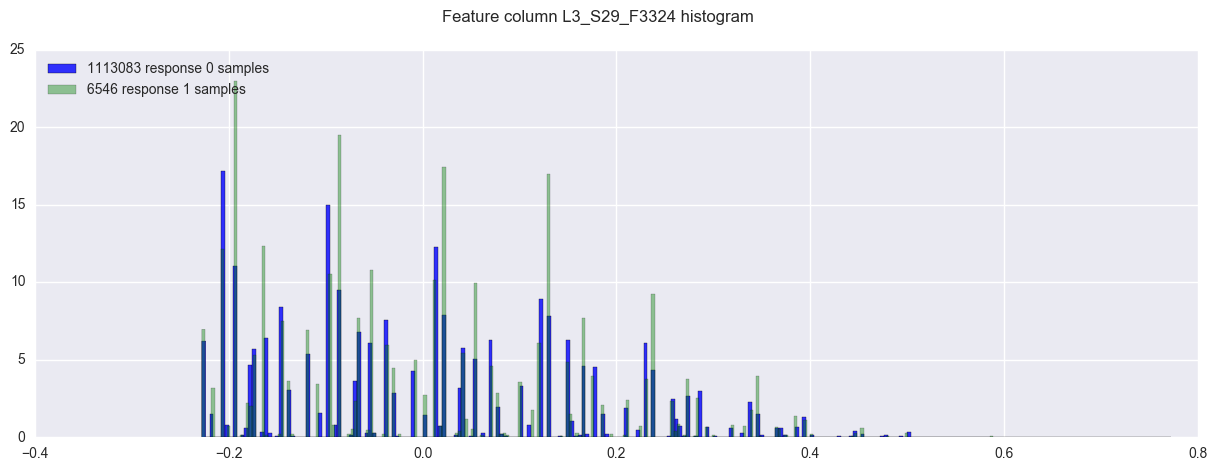

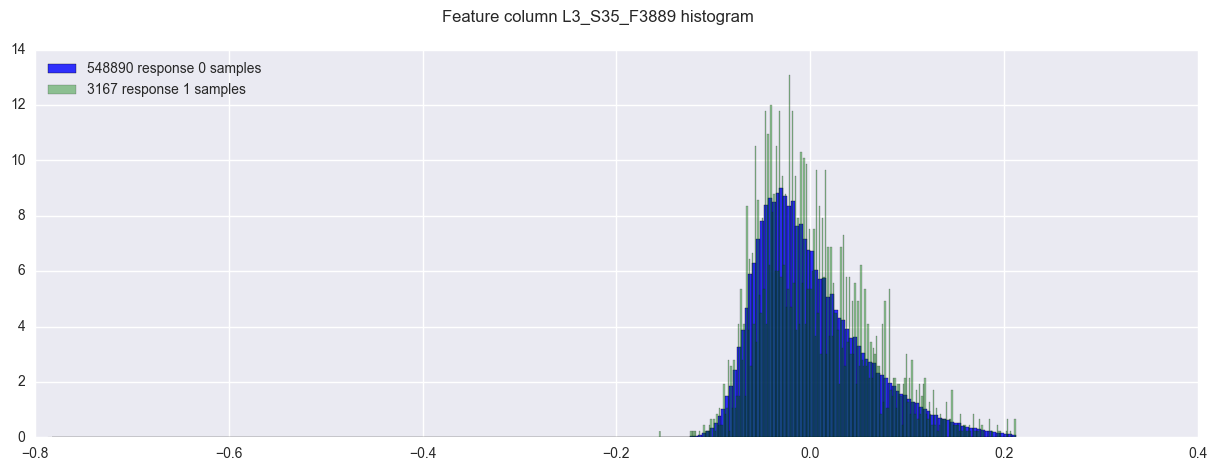

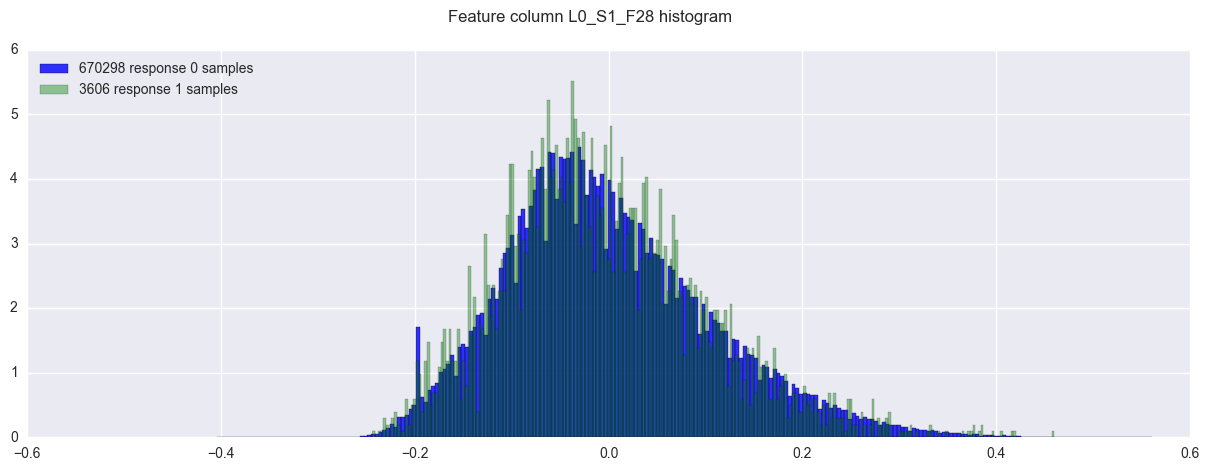

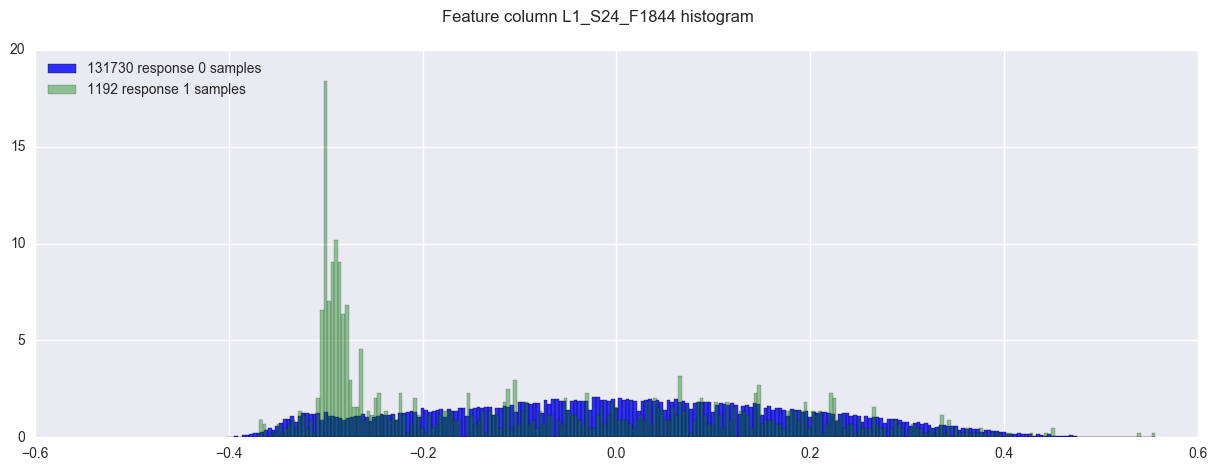

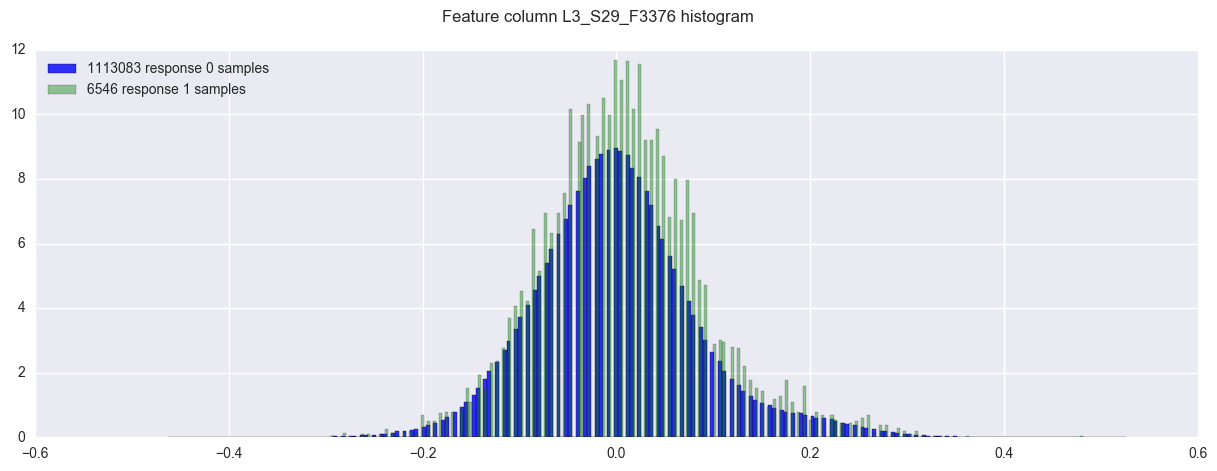

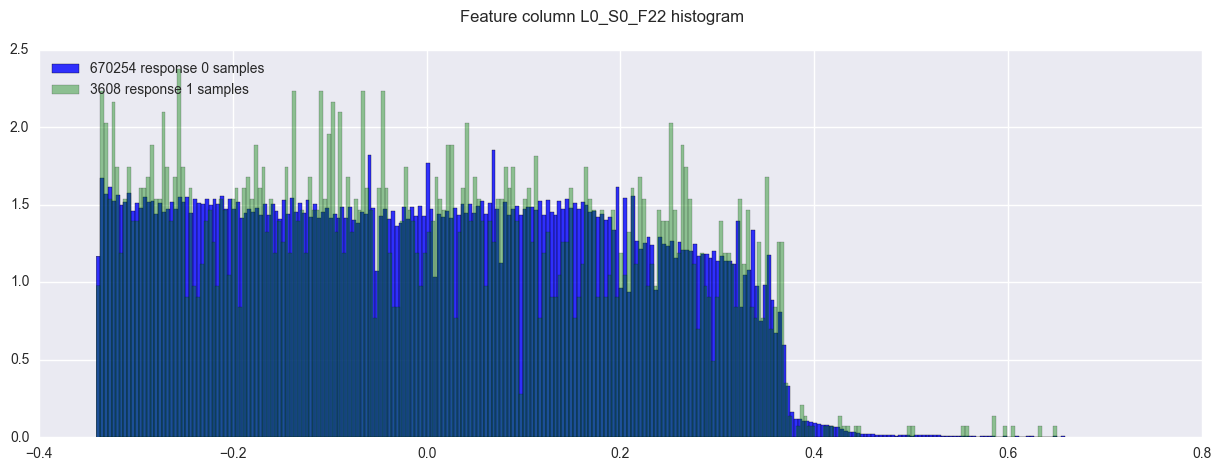

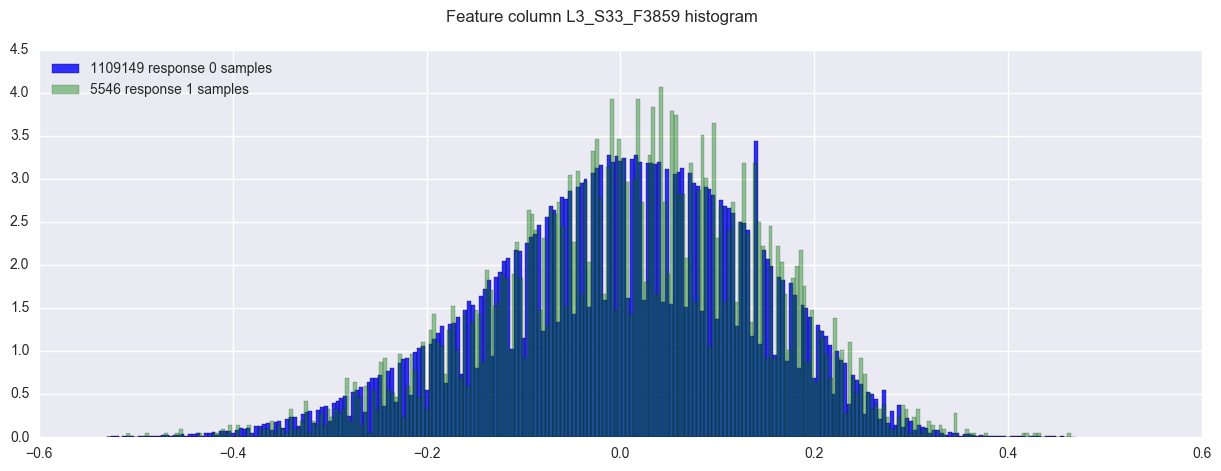

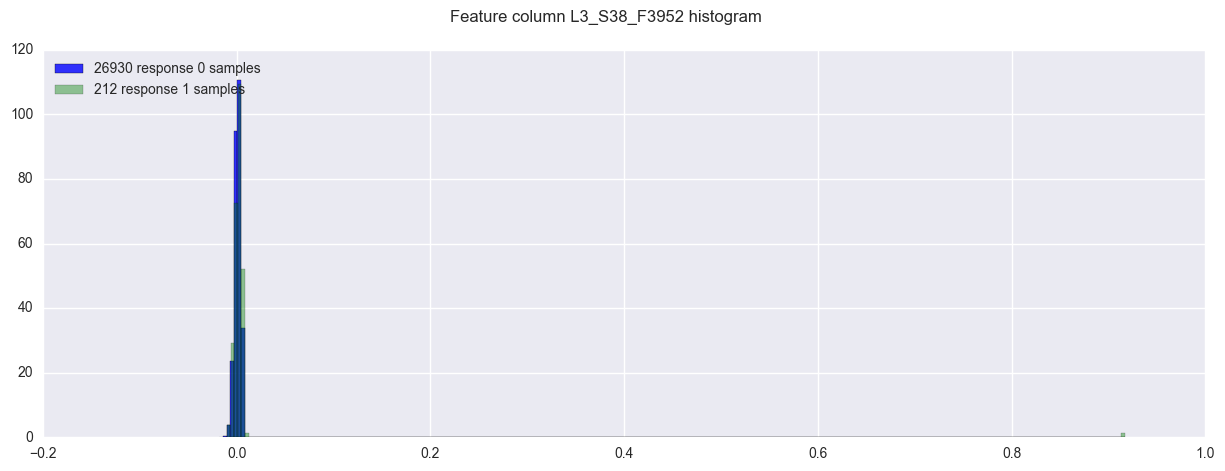

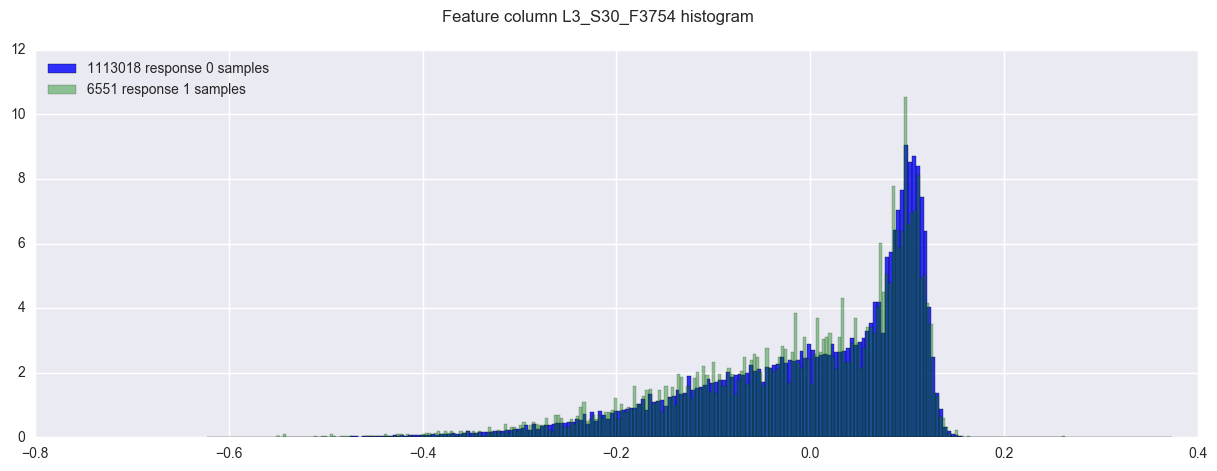

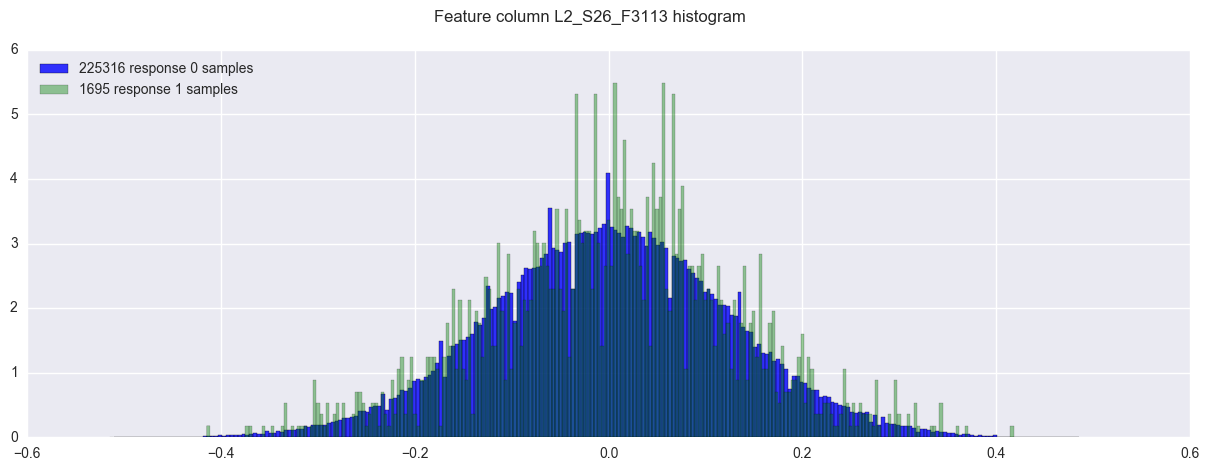

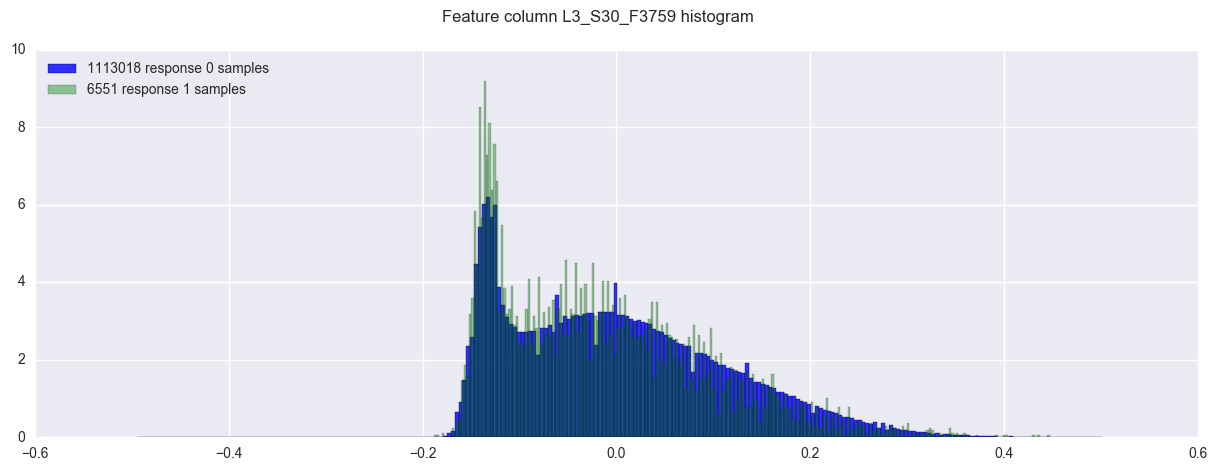

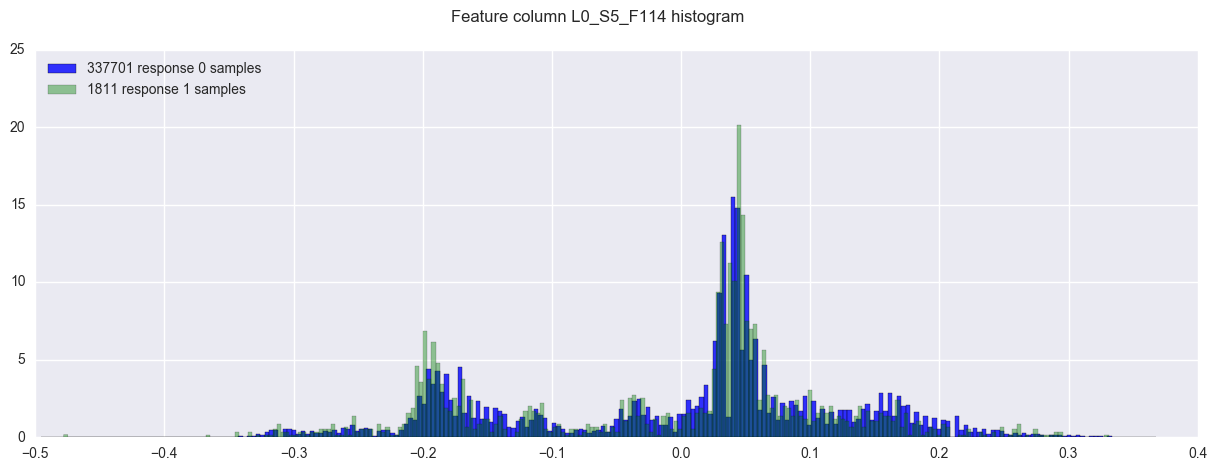

In [99]:
for feature in feature_names:
    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    train.loc[:, feature][(train.Response == 0)].dropna().hist(bins=250, alpha=0.8, color='b', normed=True, #ax=axes[0],
                                                        label='%d response 0 samples' % len(train.loc[:, feature][(train.Response == 0)].dropna()))
    train.loc[:, feature][(train.Response == 1)].dropna().hist(bins=250, alpha=0.4, color='g', normed=True, #ax=axes[0],
                                                         label='%d response 1 samples' % len(train.loc[:, feature][(train.Response == 1)].dropna()))
    
    axes.legend(loc='upper left')
    plt.suptitle('Feature column {} histogram'.format(feature), fontsize=12)
    plt.show()   

In [4]:
# Pearson correlation of all the features to Response column
#%timeit 
train[train.columns[1:]].corr()['Response']

L0_S1_F28      -0.003614
L0_S5_F114     -0.006462
L1_S24_F1604   -0.104619
L1_S24_F1632   -0.127364
L1_S24_F1695   -0.134357
L1_S24_F1723   -0.185300
L1_S24_F1844   -0.042401
L1_S24_F1846   -0.062711
L2_S26_F3113    0.001529
L3_S29_F3321    0.003360
L3_S29_F3324    0.000418
L3_S29_F3354   -0.005510
L3_S29_F3376    0.006219
L3_S29_F3407    0.008388
L3_S30_F3754   -0.005668
L3_S30_F3759   -0.011190
L3_S32_F3850   -0.009987
L3_S33_F3855   -0.000521
L3_S33_F3857   -0.000424
L3_S33_F3859    0.005315
L3_S33_F3865   -0.003031
L3_S35_F3889    0.004992
L3_S38_F3952    0.040779
L3_S38_F3956    0.004470
L3_S38_F3960    0.010469
Response        1.000000
Name: Response, dtype: float64

In [5]:
## Split the classes into 2 databases, exclude 'Response'
X_0 = train[train['Response'] == 0].iloc[:, :-1]
X_1 = train[train['Response']==1].iloc[:, :-1]

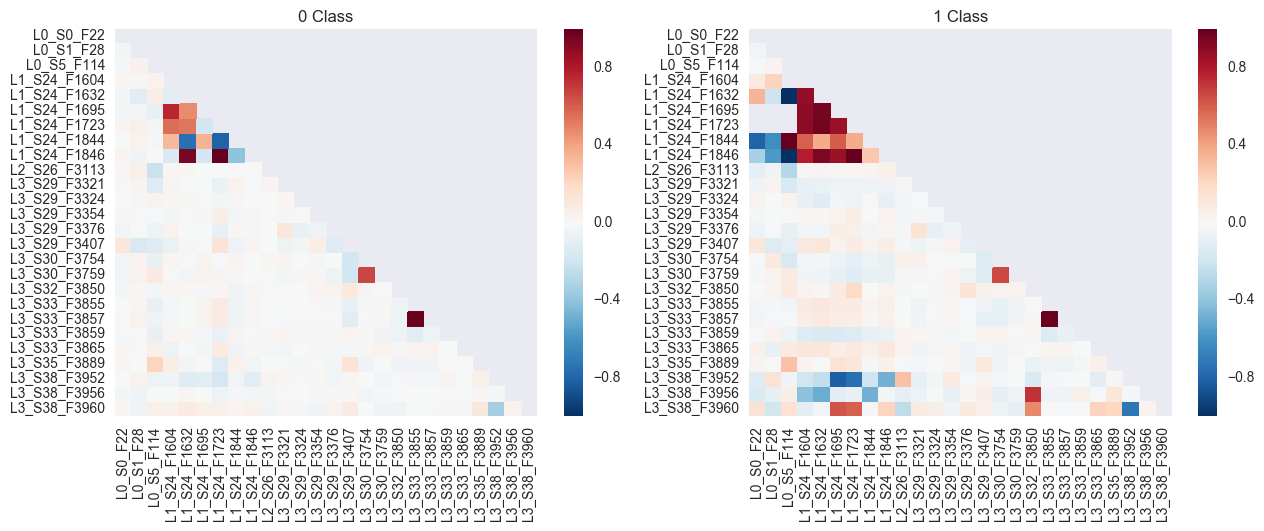

In [6]:
f_size = (15,5)
_, (ax1, ax2) = plt.subplots(1,2, figsize = f_size)
triang_mask = np.zeros((X_0.shape[1], X_1.shape[1]))
triang_mask[np.triu_indices_from(triang_mask)] = True
ax1.set_title('0 Class')
heat1 = sns.heatmap(X_0.corr(), mask = triang_mask, ax = ax1,)
fig = heat1.get_figure()
fig.savefig("output.png")


ax2.set_title('1 Class')
sns.heatmap(X_1.corr(), mask = triang_mask, ax = ax2)

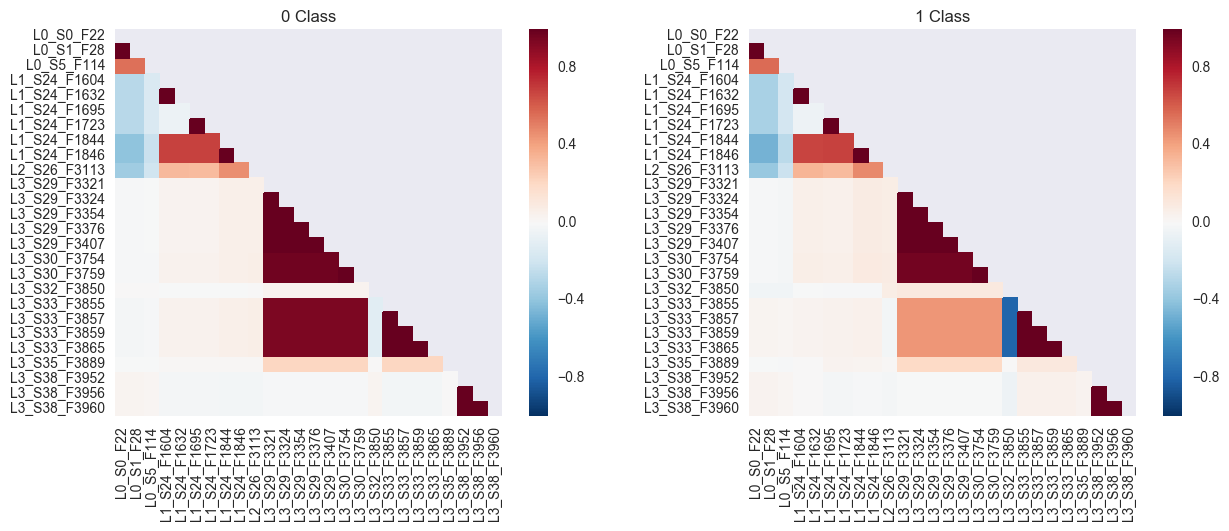

In [8]:
nan_1 = np.isnan(X_1)
nan_0 = np.isnan(X_0)

triang_mask = np.zeros((X_1.shape[1], X_0.shape[1]))
triang_mask[np.triu_indices_from(triang_mask)] = True
_, (ax1, ax2) = plt.subplots(1,2, figsize=f_size)
ax1.set_title('0 Class')
sns.heatmap(nan_0.corr(), square=True, mask = triang_mask, ax = ax1)
ax2.set_title('1 Class')
sns.heatmap(nan_1.corr(), square=True, mask = triang_mask,  ax = ax2)